# Part A:

In [1]:
#libraries
import numpy as np 
import pandas as pd
import cv2
import seaborn as sns
import random

#preproccesing
from sklearn.metrics import classification_report,f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# visulization
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Adaline:

In [2]:
class Adaline:
    def __init__(self, learning_rate, train):
        self.learning_rate = learning_rate
        self.train = train

    def _weight_genarate(self):
        weight = []
        for i in range(2):
            random.seed(i)
            rand = random.uniform(0, 0.01)
            rand = round(rand, 4)
            weight.append(rand)

        random.seed(4)
        bias = random.uniform(0, 1)
        bias = round(bias, 4)
        return weight, bias

    def fit(self):
        EPS = 0.000001
        weight, bias = self._weight_genarate()

        for index, row in self.train.iterrows():
            predicted = bias + row['x'] * weight[0] + row['y'] * weight[1]

            weight[0] = round((weight[0] + self.learning_rate * (row['value'] - predicted) * row['x']), 3)
            weight[1] = round((weight[1] + self.learning_rate * (row['value'] - predicted) * row['y']), 3)
            bias = round((bias + self.learning_rate * (row['value'] - predicted)), 3)

            # error calc
            error = (row['value'] - predicted) ** 2
            if error <= EPS or error == 0:
                break
        return weight, bias

    def predict(self, test, weight, bias):
        count = 0
        pred = []
        for index, row in test.iterrows():
            prediction = bias + (row['x'] * weight[0]) + (row['y'] * weight[1])
            if prediction > 0:
                prediction = 1
            else:
                prediction = -1
            pred.append(prediction)

            if prediction == row['value']:
                count += 1

        test['predict'] = pred
        return count

    def score(self, pred, test):
        acurr = pred / len(test)
        res = round(acurr, 4)
        return res

<b> Main:

In [3]:
def build_data_partA(i):
    x = []
    y = []
    value = []
    random.seed(i)
    for i in range(1000):
        randX = random.randint(-10000, 10000)
        randY = random.randint(-10000, 10000)
        x.append(randX / 100)
        y.append(randY / 100)
        if y[i] > 1:
            value.append(1)
        else:
            value.append(-1)

    end = {'x': x, 'y': y, 'value': value}
    df = pd.DataFrame(data=end, columns=['x', 'y', 'value'])
    return df

In [4]:
def build_data_partB(i):
    x = []
    y = []
    value = []
    random.seed(i)
    for i in range(1000):
        randX = random.randint(-10000, 10000)
        randY = random.randint(-10000, 10000)
        x.append(randX / 100)
        y.append(randY / 100)
        if 4 <= (y[i] ** 2 + x[i] ** 2) <= 9:
            value.append(1)
        else:
            value.append(-1)

    end = {'x': x, 'y': y, 'value': value}
    df = pd.DataFrame(data=end, columns=['x', 'y', 'value'])
    return df


In [5]:
def plotting(test):
    f, ax = plt.subplots(1, 2)
    ax[0].set_title("value")
    ax[1].set_title("predict")

    for index, row in test.iterrows():
        if row['value'] == 1:
            ax[0].plot(row['x'], row['y'], markersize=2, marker="o", color="blue")
        else:
            ax[0].plot(row['x'], row['y'], markersize=2, marker="o", color="red")
        if row['predict'] == 1:
            ax[1].plot(row['x'], row['y'], markersize=2, marker="o", color="blue")
        else:
            ax[1].plot(row['x'], row['y'], markersize=2, marker="o", color="red")
    plt.show()

In [6]:
def main():
    part = input("Enter the relevant part (A or B): ")

    # part A
    if part == 'A':
        train = build_data_partA(1)
        test = build_data_partA(9)
        ada = Adaline(0.0001, train)
        weight, bias = ada.fit()
        ada_pred = ada.predict(test, weight, bias)
        ada_score = ada.score(ada_pred, test)
        print("Acurracy score:", ada_score * 100)
        plotting(test)

    # part B
    elif part == 'B':
        train = build_data_partB(9)
        test = build_data_partB(1)
        ada = Adaline(0.001, train)
        weight, bias = ada.fit()
        ada_pred = ada.predict(test, weight, bias)
        ada_score = ada.score(ada_pred, test)
        print("Acurracy score:", ada_score * 100)
        plotting(test)

    else:
        print("Not Valid")

Enter the relevant part (A or B): A
Acurracy score: 94.89999999999999


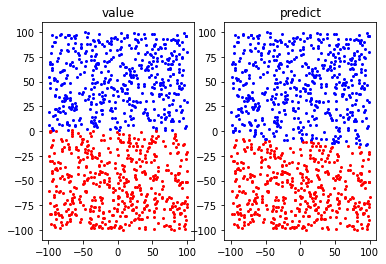

In [7]:
main()